<a href="https://colab.research.google.com/github/kbehrman/foundational-python-for-data-science/blob/main/Chapter-12%3ANLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.13


Using a computer to derive insights into text is widely useful. The subset of data science which addresses this is natural language processing. The natural language tookkit, nltk, is a python package for all things language processing. In this chapter we'll take a quick look at this powerful package. 

## Sample texts

The nltk package offers sample texts from many sources. These can be downloaded and then used to explore language processing. [Project Gutenberg](http://www.gutenberg.org/) is a project to put books online. It is comprised largely of books in the public domain. A subset of this collection is available for download for use with nltk. First we download the data using the nltk.download() function. This function will download the data into a nltk_data/corpora directry in our homedrive. 

In [ ]:
import nltk

In [ ]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

We can then import the data into our python session as a corpus reader object. 

In [ ]:
from nltk.corpus import gutenberg
gutenberg

<PlaintextCorpusReader in '/root/nltk_data/corpora/gutenberg'>

There are corpus readers for different type of text source, in this case we are using a PlantextCorpusReader. We can list the individual texts using the fileids() method. This lists the file names, which can be used to load the texts themselves.

In [ ]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

The corpus reader has different methods for reading the text. We can load the text broken into individual words, sentences, or paragraphs. In fig... we demonstrate opening the text to William Shakespeares Julius Casear in all three formats.

In [ ]:
caesar_w = gutenberg.words('shakespeare-caesar.txt')
caesar_w

['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', ...]

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
caesar_s = gutenberg.sents('shakespeare-caesar.txt')
caesar_s

[['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', 'by', 'William', 'Shakespeare', '1599', ']'], ['Actus', 'Primus', '.'], ...]

In [ ]:
caesar_p = gutenberg.paras('shakespeare-caesar.txt')
caesar_p

[[['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', 'by', 'William', 'Shakespeare', '1599', ']']], [['Actus', 'Primus', '.'], ['Scoena', 'Prima', '.']], ...]

Notice that before we could parse the text into sentences, we needed to download the punkt tokenizer. A tokenizer is used to break up, or tokenize, a piece of text. The punkt tokenizer is used to break text into sentences. It is designed to work on texts of numerious languages. 

If we look at the nltk sub-directory of our home directory using the shell command ls, we can see there are directories for corpora and tokenizers. In the corpora directory we can see the collection we have downloaded. In the tokenizers directory, the tokenizers we have downloaded. In the punkt subdirectory, there are files for each language covered.

In [ ]:
!ls ~/nltk_data

corpora  tokenizers


In [ ]:
!ls ~/nltk_data/corpora

gutenberg  gutenberg.zip


In [ ]:
!ls ~/nltk_data/tokenizers

punkt  punkt.zip


In [ ]:
!ls ~/nltk_data/tokenizers/punkt

czech.pickle	 finnish.pickle  norwegian.pickle   russian.pickle
danish.pickle	 french.pickle	 polish.pickle	    slovene.pickle
dutch.pickle	 german.pickle	 portuguese.pickle  spanish.pickle
english.pickle	 greek.pickle	 PY3		    swedish.pickle
estonian.pickle  italian.pickle  README		    turkish.pickle


## Frequency Distributions

We can count the number of occurances of each word in the text using the nltk.FreqDist class. Here we use a FreqDist to see the most common words in the text:

In [ ]:
ceasar_dist = nltk.FreqDist(caesar_w)
ceasar_dist.most_common(15)

[(',', 2204),
 ('.', 1296),
 ('I', 531),
 ('the', 502),
 (':', 499),
 ('and', 409),
 ("'", 384),
 ('to', 370),
 ('you', 342),
 ('of', 336),
 ('?', 296),
 ('not', 249),
 ('a', 240),
 ('is', 230),
 ('And', 218)]

If we want to see the most common words without including punctuation marks, we can filter them out. The standard library string module has a punction attribute that we can leverage. In listing ... we loop through the original words of the text. With each item, we check if it is a punctuation mark, and if it is not, add it to a new list, caesar_r. We compare the lengths of the original and the filtered to see that there were 4,960 punctuation marks in the text. We then make a new frequency distribution to see the most common non-punctuation words.

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
caesar_r = []
for word in caesar_w:
    if word not in string.punctuation:
        caesar_r.append(word)

len(caesar_w) - len(caesar_r)

4960

In [ ]:
ceasar_dist = nltk.FreqDist(caesar_r)
ceasar_dist.most_common(15)

[('I', 531),
 ('the', 502),
 ('and', 409),
 ('to', 370),
 ('you', 342),
 ('of', 336),
 ('not', 249),
 ('a', 240),
 ('is', 230),
 ('And', 218),
 ('d', 215),
 ('in', 204),
 ('that', 200),
 ('Caesar', 189),
 ('my', 188)]

We see that 'Caesar' is in the text 189 times. The other common words do not give us much insight. If we wish to filter out common words such as 'the' and 'is', nltk supplies us with a corpus called stopwords. In listing ... we download this corpus, and filter these words out before making a new frequency distribution.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
english_stopwords = stopwords.words('english')
english_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
caesar_r = []
for word in caesar_w:
    if word not in string.punctuation:
        if word.lower() not in english_stopwords:
            caesar_r.append(word)

len(caesar_w) - len(caesar_r)

14706

In [ ]:
caesar_dist = nltk.FreqDist(caesar_r)
caesar_dist.most_common(15)

[('Caesar', 189),
 ('Brutus', 161),
 ('Bru', 153),
 ('haue', 128),
 ('shall', 107),
 ('Cassi', 107),
 ('thou', 100),
 ('Cassius', 85),
 ('Antony', 75),
 ('know', 66),
 ('Enter', 63),
 ('men', 62),
 ('vs', 62),
 ('man', 58),
 ('thee', 55)]

Our most common words now give us more insight into the text, we can see which characters are mentioned the most. Not surprisingly Caesar and Brutus are at the top. 

In listing ... we look at some of the methods of the FreqDist class. 

In [ ]:
caesar_dist.max()

'Caesar'

In [ ]:
caesar_dist['Cassi']

107

In [ ]:
caesar_dist.freq('Cassi')

0.009616248764267098

In [ ]:
caesar_dist.N()

11127

In [ ]:
caesar_dist.tabulate(10)

 Caesar  Brutus     Bru    haue   shall   Cassi    thou Cassius  Antony    know 
    189     161     153     128     107     107     100      85      75      66 


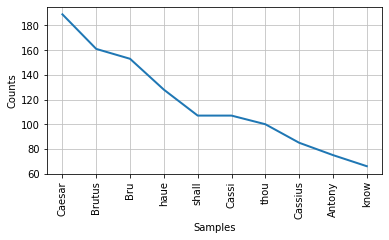

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.gcf().subplots_adjust(bottom=0.30) # to avoid x-ticks cut-off

caesar_dist.plot(10)
plt.tight_layout()

## Text Objects

The nltk library offers a Text class. This class wraps up functionality useful when first exploring a new text. The Text class takes a list of words as an argument during initialization.

In [ ]:
from nltk.text import Text  
caesar_t = Text(caesar_w)
type(caesar_t)

nltk.text.Text

The concordance method shows the context around a given word. Here we get five examples of 'Antony' in context:

In [ ]:
caesar_t.concordance('Antony', lines=5)

Displaying 5 of 75 matches:
efulnesse . Exeunt . Enter Caesar , Antony for the Course , Calphurnia , Porti
rt Of that quicke Spirit that is in Antony : Let me not hinder Cassius your de
. He loues no Playes , As thou dost Antony : he heares no Musicke ; Seldome he
fer ' d him the Crowne ? Cask . Why Antony Bru . Tell vs the manner of it , ge
, I did not marke it . I sawe Marke Antony offer him a Crowne , yet ' twas not


The collocations method displays words that most appear together:

In [ ]:
caesar_t.collocations(num=5)

Mark Antony; Marke Antony; Good morrow; Caius Ligarius; Metellus
Cymber


The similar methods finds words that appear in contexts similar to a given word:

In [ ]:
caesar_t.similar('Caesar')

me it brutus you he rome that cassius this if men worke him vs feare
world thee what know day


The findall method prints text which matches a regular expression. Regular expressions are a powerful language for searching text. We define the regular expression match pattern using '<' and '>' to define word boundries and '.*' as a wildcard matching anything. Our pattern then matches all occurances to the word 'O' followed by a word starting with 'C'.

In [ ]:
caesar_t.findall(r'<O><C.*>')

O Cicero; O Cassius; O Conspiracie; O Caesar; O Caesar; O Caesar; O
Constancie; O Caesar; O Caesar; O Caesar; O Cassius; O Cassius; O
Cassius; O Coward; O Cassius; O Clitus


The dispersion_plot method lets us compare where in a text given words occur:

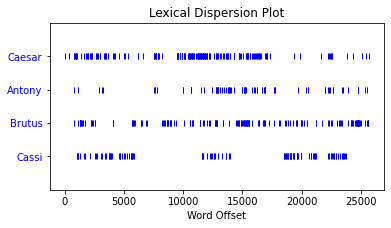

<Figure size 432x288 with 0 Axes>

In [ ]:


fig = plt.figure()
plt.gcf().subplots_adjust(bottom=0.30) # to avoid x-ticks cut-off

caesar_t.dispersion_plot(['Caesar', 'Antony', 'Brutus', 'Cassi'])
plt.tight_layout()

# Classifying Text

NLTK offers classifier classes that implement different algorithms for solving the labeling of text data. Generally to create a model for classifying text, we need to prepare a set of features paired with a category or label. Let's walk through a simple example using the brown corpus made available through nltk. This corpus has pre-categorized texts. Let us suppose that we believe we can label a paragraph from one of these texts as either 'editorial' or 'fiction' based on the appearance of certain words, pointed to by the variable tell_words.

In [ ]:
tell_words = ['american', 'city', 'congress', 'country', 'county', 'editor', 'fact',
              'government', 'national', 'nuclear', 'party', 'peace', 'political', 'power', 'president',
              'public', 'state', 'states', 'united', 'war', 'washington', 'world', 'big',
              'church', 'every', 'eyes', 'face', 'felt', 'found', 'god', 'hand', 'head',
              'home', 'house', 'knew', 'moment', 'night', 'room', 'seemed', 'stood', 'think',
              'though', 'thought', 'told', 'voice']


In listing... we download the corpuses we will use and get paragraphs for the editorial and fiction categories.

In [ ]:
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ed_p = brown.paras(categories='editorial')

In [ ]:
fic_p = brown.paras(categories='fiction')

In [ ]:
print(len(ed_p))
print(len(fic_p))

1003
1043


The format of the supplied paragraphs is lists of lists, with the sub-lists representing sentences. For the purpose of this exercise, we want a set of words for each paragraph. In listing... we define a flatten method and then flatten the paragraphs in each data set.

In [ ]:
def flatten(paragraph):
    output = set([])
    for item in paragraph:
       if isinstance(item, (list, tuple)):
           output.update(item)
       else:
           output.add(item)
    return output

In [ ]:
ed_flat = []
for paragraph in ed_p:
    ed_flat.append(flatten(paragraph))



In [ ]:
fic_flat = []
for paragraph in fic_p:
    fic_flat.append(flatten(paragraph))


We next need to pair each paragraph with the label based on it's source category. in list... we do this for both editorial and fiction texts. We then shuffle the order, using the shuffle method from the random module, to ensure that the order will not influence the classifier. 

In [ ]:
labeled_data = []
for paragraph in ed_flat:
    labeled_data.append((paragraph, 'editorial'))

for paragraph in fic_flat:
    labeled_data.append((paragraph, 'fiction'))

from random import shuffle
shuffle(labeled_data)

The classifier does not use the original paragraphs, but rather expects feature set. This will be in the form of a dictionary mapping features to values. In listing... we define a function to create a feature dictionary whose values are set to True if a tell word is found in the paragraph, and False if not. We then use this to a list of paired features and labels. We split this into training an test data, and then we are ready to train our classifier.  

In [ ]:
 def define_features(paragraph):
    features = {}
    for tell_word in tell_words:
        features[tell_word] = tell_word in paragraph
    return features

In [ ]:
feature_data = []
for labeled_paragraph in labeled_data:
    paragraph, label = labeled_paragraph
    feature_data.append((define_features(paragraph), label,))

In [ ]:
train_data = feature_data[:1400]
test_data = feature_data[1400:]

In listing ... we train our model, using the nltk.NaiveBayesClassifier class. We then use the trained model to classify an individual feature set, check which of the tell words had the most influence on the training and then check the accuracy using the test data.

In [ ]:
decision_tree = nltk.NaiveBayesClassifier.train(train_data)

In [ ]:
decision_tree.classify(train_data[0][0])

'editorial'

In [ ]:
decision_tree.show_most_informative_features()

Most Informative Features
                  editor = True           editor : fictio =     21.1 : 1.0
              government = True           editor : fictio =     18.1 : 1.0
               political = True           editor : fictio =     16.6 : 1.0
                   stood = True           fictio : editor =     14.1 : 1.0
                  seemed = True           fictio : editor =     12.8 : 1.0
                 thought = True           fictio : editor =     12.0 : 1.0
                    knew = True           fictio : editor =     11.5 : 1.0
                 nuclear = True           editor : fictio =      8.2 : 1.0
                    felt = True           fictio : editor =      7.7 : 1.0
                   peace = True           editor : fictio =      7.3 : 1.0


In [ ]:
nltk.classify.accuracy(decision_tree, test_data)

0.6486068111455109

We that our model is about %66 accurant in predicting the labels for our test data, better than a coin flip. This example should give you a sense of using a nltk classifier. There is much more to nltk than we have covered here. If you want to learn more about natural language processing using nltk, we recomend checking out the book [Natural Language Processing with Python](http://www.nltk.org/book/) authored by the creators of the library.

## Summary

The library nltk contains tools for processing text. This library comes with example texts that you can download and work with. The FreqDist class lets you gain insights into the frequencey different words appear. The Text class is a handy way to explore a new text. Nltk comes with built in classifier classes which can be used to categorize text based on training data.

1. Load the text Emma by Jane Austen as words, sentences, and paragraphs
2. Count the accurance of the word Alice in Alice in Wonderland by Lewis Carroll.
3. Use tabulate to view the top ten words in Alice in Wonderland excluding punctuation, and stopwords.
4. Find the words that are similar to 'Rabbit' in Alice in Wonderland.
5. Use the corpus 'names' to find the ten most frequent names in Hamlet.